<a href="https://colab.research.google.com/github/utkarshjadhav96/ML-Lab/blob/main/ML_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/utkarshjadhav96/ML-Lab/main/employee_data.csv"  # Replace with actual raw CSV link
df = pd.read_csv(url)

In [3]:
print(df.head())

   Employee_ID        Name  Age  Salary Department  Experience (Years)  \
0          101  Employee_1   50  110592         HR                   9   
1          102  Employee_2   36   48110         IT                  29   
2          103  Employee_3   29  119309         IT                  26   
3          104  Employee_4   42   67266  Marketing                  25   
4          105  Employee_5   40   92992    Finance                  24   

        City  Gender  Performance Score  
0     Denver  Female                 84  
1  San Diego    Male                 92  
2    Chicago  Female                 97  
3    Seattle    Male                 65  
4     Boston    Male                 91  


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
df.fillna(df.mean(), inplace=True)


In [6]:
X = df.drop(columns=['Salary'])  # Replace 'Salary' with actual target column
y = df['Salary']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print(y_pred)

[83408.00502885 60291.9651239  89960.46867228 70465.00510396
 92627.57671726 89489.31812526 77055.89719715 91716.58600842
 61186.53531894 78437.28292835 68793.55825437 81747.9590843
 96160.61437757 68611.98352783 71062.56708353 74567.19134849
 98800.63697368 87388.32365499 86058.20452362 82855.32496082]


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Model Performance:
Mean Absolute Error (MAE): 22228.061485691876
Mean Squared Error (MSE): 634977793.1005256
Root Mean Squared Error (RMSE): 25198.765705893722
R-squared (R²): -0.22380482554285974


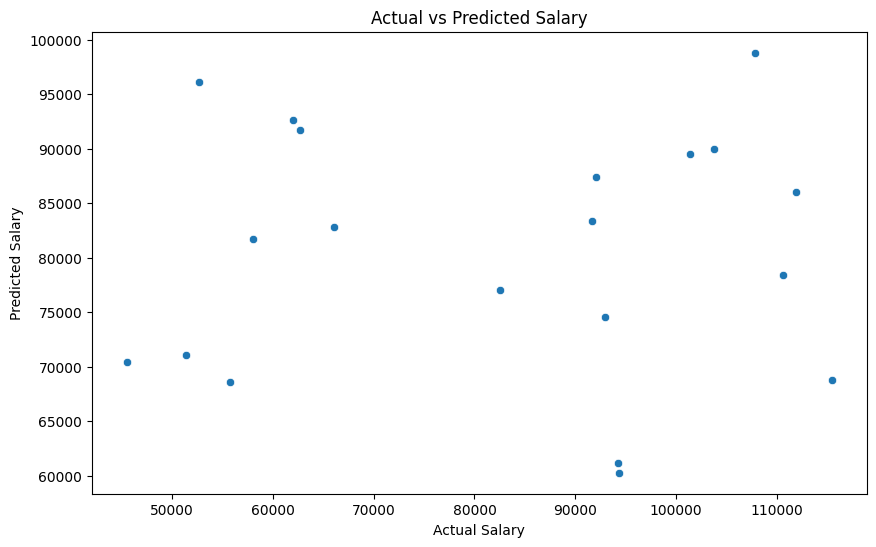

In [14]:
# Visualizing Predictions vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

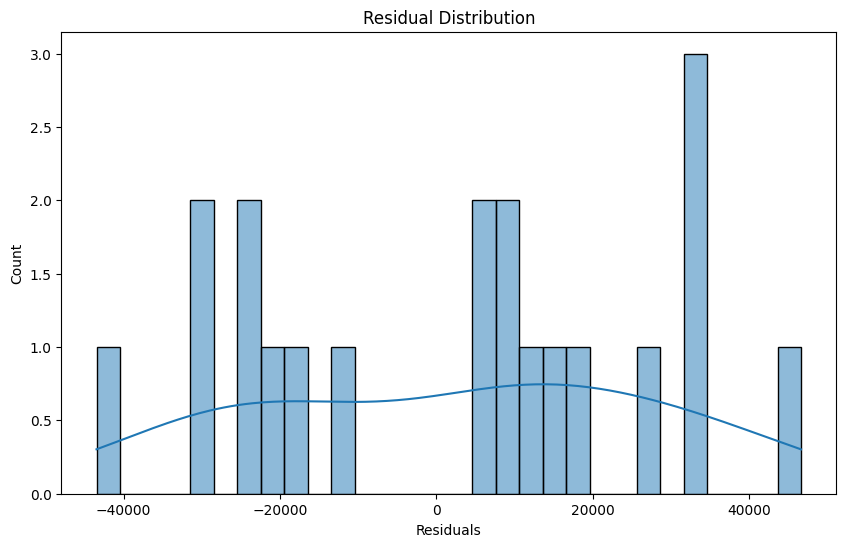

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()